In [47]:
from ultralytics import YOLO

import cv2

model = YOLO(r"D:\codes\ultralytics-main\runs\detect\train49\weights\last.pt")
# model = YOLO(r"D:\Models\yolo11n.pt")

image 1/1 D:\Datas\mykz_yolo\train\IMG_2551.JPG: 640x448 1 kz, 3 wkzs, 67.2ms
Speed: 4.5ms preprocess, 67.2ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 448)
4


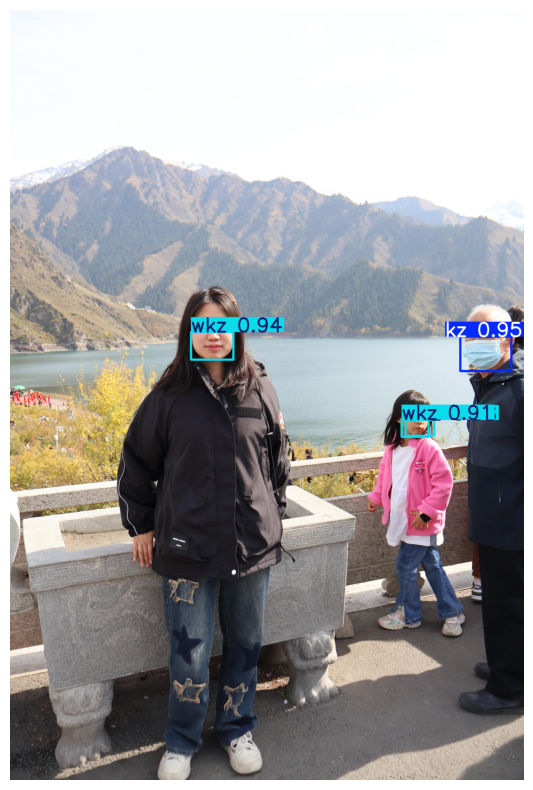

In [52]:
img_path=r"D:\Datas\mykz_yolo\train\IMG_2551.JPG"
import cv2
import matplotlib.pyplot as plt

# 读取图像
image = cv2.imread(img_path)

def my_imshow(image_rgb):
    plt.imshow(image_rgb)
    plt.axis('off')  # 可选，关闭坐标轴
    plt.show()

results = model.predict(source=img_path,classes=[0,1])
print(len(results[0]))
image=results[0].plot()
# 将图像从BGR转换为RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#高像素展示
plt.figure(figsize=(10, 10))
my_imshow(image_rgb)

In [32]:
import cv2
import numpy as np


def yolo_to_bbox(image_width, image_height, yolo_data):
    class_id, x_center, y_center, width, height = yolo_data
    x_center = float(x_center) * image_width
    y_center = float(y_center) * image_height
    width = float(width) * image_width
    height = float(height) * image_height
    x_min = int(x_center - width / 2)
    y_min = int(y_center - height / 2)
    x_max = int(x_center + width / 2)
    y_max = int(y_center + height / 2)
    return int(class_id), x_min, y_min, x_max, y_max


def visualize_yolo(image_path, label_path, output_path):
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Could not open or find the image: {image_path}")
    image_height, image_width, _ = image.shape

    with open(label_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            yolo_data = list(map(float, line.strip().split()))
            class_id, x_min, y_min, x_max, y_max = yolo_to_bbox(image_width, image_height, yolo_data)
            # 这里可以根据class_id设置不同颜色，示例统一用红色
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 0, 255), 2)
            # 可以添加显示类别标签
            cv2.putText(image, str(class_id), (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    cv2.imwrite(output_path, image)


if __name__ == "__main__":
    image_path = r"D:\Datas\mykz_yolo\train\IMG_2363.JPG"
    label_path = r"D:\Datas\mykz_yolo\train\IMG_2363.txt"
    output_path = 'bboxvisualized.png'
    visualize_yolo(image_path, label_path, output_path)
